In [1]:
import xarray as xr
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
loss = torch.nn.L1Loss()
loss_sum = torch.nn.L1Loss(reduction='sum')


loss_n = torch.nn.L1Loss(reduction='none')

In [4]:
grib = xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/inputs/ClimateInputData_201901010.grib")

In [84]:
grib['r']

<xarray.DataArray 'r' (isobaricInhPa: 13, latitude: 721, longitude: 1440)> Size: 54MB
[13497120 values with dtype=float32]
Coordinates:
    number         int64 8B ...
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
    surface        float64 8B ...
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 8B ...
  * isobaricInhPa  (isobaricInhPa) float64 104B 1e+03 925.0 850.0 ... 100.0 50.0
Attributes: (12/30)
    GRIB_paramId:                             157
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           r
    GRIB_totalNumber:                         0
    GRIB_units:                               %
    long_name:                                Relative humidity
    units:                                    %
    standard_name:                            relative_humidity

In [66]:
grib['r']

<xarray.DataArray 'r' (isobaricInhPa: 13, latitude: 721, longitude: 1440)> Size: 54MB
[13497120 values with dtype=float32]
Coordinates:
    number         int64 8B ...
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
    surface        float64 8B ...
  * latitude       (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 12kB 0.0 0.25 0.5 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 8B ...
  * isobaricInhPa  (isobaricInhPa) float64 104B 1e+03 925.0 850.0 ... 100.0 50.0
Attributes: (12/30)
    GRIB_paramId:                             157
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         isobaricInhPa
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           r
    GRIB_totalNumber:                         0
    GRIB_units:                               %
    long_name:                                Relative humidity
    units:                                    %
    standard_name:                            relative_humidity

In [4]:
obs = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr")
era = obs.sel(time="2019-01-01T00:00")
era['relative_humidity']

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


<xarray.DataArray 'relative_humidity' (level: 13, latitude: 721, longitude: 1440)> Size: 54MB
[13497120 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    time       datetime64[ns] 8B 2019-01-01

In [63]:
list(era.keys())

['10m_u_component_of_wind',
 '10m_v_component_of_wind',
 '10m_wind_speed',
 '2m_dewpoint_temperature',
 '2m_temperature',
 'above_ground',
 'ageostrophic_wind_speed',
 'angle_of_sub_gridscale_orography',
 'anisotropy_of_sub_gridscale_orography',
 'boundary_layer_height',
 'divergence',
 'eddy_kinetic_energy',
 'geopotential',
 'geopotential_at_surface',
 'geostrophic_wind_speed',
 'high_vegetation_cover',
 'integrated_vapor_transport',
 'lake_cover',
 'land_sea_mask',
 'lapse_rate',
 'leaf_area_index_high_vegetation',
 'leaf_area_index_low_vegetation',
 'low_vegetation_cover',
 'mean_sea_level_pressure',
 'mean_surface_latent_heat_flux',
 'mean_surface_net_long_wave_radiation_flux',
 'mean_surface_net_short_wave_radiation_flux',
 'mean_surface_sensible_heat_flux',
 'mean_top_downward_short_wave_radiation_flux',
 'mean_top_net_long_wave_radiation_flux',
 'mean_top_net_short_wave_radiation_flux',
 'mean_vertically_integrated_moisture_divergence',
 'potential_vorticity',
 'relative_humidi

In [ ]:
sfc = [
    ['u10','10m_u_component_of_wind'],
    ['v10','10m_v_component_of_wind'],
    ['t2m','2m_temperature'],
    ['sp','surface_pressure'],
    ['msl','mean_sea_level_pressure'],
    ['tcwv','total_column_water_vapour'],
    
]

In [8]:
 ordering = [
    "u10",
    "v10",
    "100u",
    "100v",
    "t2m",
    "sp",
    "msl",
    "tcwv",
    "u50",
    "u100",
    "u150",
    "u200",
    "u250",
    "u300",
    "u400",
    "u500",
    "u600",
    "u700",
    "u850",
    "u925",
    "u1000",
    "v50",
    "v100",
    "v150",
    "v200",
    "v250",
    "v300",
    "v400",
    "v500",
    "v600",
    "v700",
    "v850",
    "v925",
    "v1000",
    "z50",
    "z100",
    "z150",
    "z200",
    "z250",
    "z300",
    "z400",
    "z500",
    "z600",
    "z700",
    "z850",
    "z925",
    "z1000",
    "t50",
    "t100",
    "t150",
    "t200",
    "t250",
    "t300",
    "t400",
    "t500",
    "t600",
    "t700",
    "t850",
    "t925",
    "t1000",
    "r50",
    "r100",
    "r150",
    "r200",
    "r250",
    "r300",
    "r400",
    "r500",
    "r600",
    "r700",
    "r850",
    "r925",
    "r1000",
]
ordering_reverse = {
    "10m_u_component_of_wind":0,
    "10m_v_component_of_wind":1,
    "2m_temperature":4,
    "surface_pressure":5,
    "mean_sea_level_pressure":6,
    "total_column_water_vapour":7,
}

levels_per_pl = {"u_component_of_wind":[1000,925,850,700,600,500,400,300,250,200,150,100,50],
                 "v_component_of_wind":[1000,925,850,700,600,500,400,300,250,200,150,100,50],
                 "geopotential":[1000,925,850,700,600,500,400,300,250,200,150,100,50],
                 "temperature":[1000,925,850,700,600,500,400,300,250,200,150,100,50],
                 "relative_humidity":[1000,925,850,700,600,500,400,300,250,200,150,100,50]}

param_sfc_ERA5 = ["10m_u_component_of_wind", "10m_v_component_of_wind", "2m_temperature", "surface_pressure", "mean_sea_level_pressure", "total_column_water_vapour"]


In [7]:
grib_data = grib["u10"].to_numpy()
era_data = era["10m_u_component_of_wind"].to_numpy()

In [13]:
grib_data

array([[-0.08117676, -0.08117676, -0.08117676, ..., -0.08117676,
        -0.08117676, -0.08117676],
       [ 1.408081  ,  1.3885498 ,  1.3690186 , ...,  1.4647217 ,
         1.4451904 ,  1.4266357 ],
       [ 1.4217529 ,  1.3953857 ,  1.3621826 , ...,  1.5184326 ,
         1.4813232 ,  1.4490967 ],
       ...,
       [-4.0684814 , -4.0704346 , -4.071411  , ..., -4.0548096 ,
        -4.0596924 , -4.064575  ],
       [-3.857544  , -3.857544  , -3.857544  , ..., -3.848755  ,
        -3.8516846 , -3.8546143 ],
       [ 0.18737793,  0.18737793,  0.18737793, ...,  0.18737793,
         0.18737793,  0.18737793]], dtype=float32)

In [14]:
era_data

array([[-0.08141744, -0.08141744, -0.08141744, ..., -0.08141744,
        -0.08141744, -0.08141744],
       [ 1.4079825 ,  1.3883156 ,  1.3686484 , ...,  1.4647144 ,
         1.4450473 ,  1.4268931 ],
       [ 1.4215981 ,  1.3951234 ,  1.3618406 , ...,  1.5184206 ,
         1.4813558 ,  1.4488295 ],
       ...,
       [-4.0685315 , -4.070801  , -4.071557  , ..., -4.054916  ,
        -4.0594544 , -4.0647492 ],
       [-3.8574886 , -3.8574886 , -3.8574886 , ..., -3.8484116 ,
        -3.8514376 , -3.854463  ],
       [ 0.18711317,  0.18711317,  0.18711317, ...,  0.18711317,
         0.18711317,  0.18711317]], dtype=float32)

In [22]:
print(loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))

tensor(0.0002)
tensor(196.6056)


In [52]:
for k,v in ordering_reverse.items():
    era_data = era[k].to_numpy()
    grib_data = grib[ordering[v]].to_numpy()
    print(k)
    print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
    print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
    print()
    

10m_u_component_of_wind
mae : tensor(0.0002)
 ae : tensor(196.6056)

10m_v_component_of_wind
mae : tensor(0.0002)
 ae : tensor(191.6990)

2m_temperature
mae : tensor(0.0004)
 ae : tensor(366.2846)

surface_pressure
mae : tensor(0.2142)
 ae : tensor(222343.2656)

mean_sea_level_pressure
mae : tensor(0.0391)
 ae : tensor(40630.4141)

total_column_water_vapour
mae : tensor(0.0003)
 ae : tensor(321.1381)



In [65]:
grib_var = ["u","v","z","t","r"]
for idx,(k,v) in enumerate(levels_per_pl.items()):
    for level in v:
        era_data = era[k].sel(level=level).to_numpy()
        grib_data = grib[grib_var[idx]].sel(isobaricInhPa=level).to_numpy()
        print(k," - ",level)
        print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
        print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
        print()
        

u_component_of_wind  -  1000
mae : tensor(0.0002)
 ae : tensor(209.6335)

u_component_of_wind  -  925
mae : tensor(0.0003)
 ae : tensor(337.6348)

u_component_of_wind  -  850
mae : tensor(0.0003)
 ae : tensor(325.9742)

u_component_of_wind  -  700
mae : tensor(0.0003)
 ae : tensor(346.7081)

u_component_of_wind  -  600
mae : tensor(0.0003)
 ae : tensor(331.2361)

u_component_of_wind  -  500
mae : tensor(0.0004)
 ae : tensor(379.2252)

u_component_of_wind  -  400
mae : tensor(0.0004)
 ae : tensor(458.7249)

u_component_of_wind  -  300
mae : tensor(0.0005)
 ae : tensor(566.7017)

u_component_of_wind  -  250
mae : tensor(0.0005)
 ae : tensor(554.3401)

u_component_of_wind  -  200
mae : tensor(0.0005)
 ae : tensor(528.1893)

u_component_of_wind  -  150
mae : tensor(0.0005)
 ae : tensor(530.4503)

u_component_of_wind  -  100
mae : tensor(0.0004)
 ae : tensor(450.9664)

u_component_of_wind  -  50
mae : tensor(0.0003)
 ae : tensor(293.8737)

v_component_of_wind  -  1000
mae : tensor(0.0002)
 

In [40]:
for idx,(k,v) in enumerate(ordering_reverse.items()):
    print(idx,k,v)


0 10m_u_component_of_wind 0
1 10m_v_component_of_wind 1
2 2m_temperature 4
3 surface_pressure 5
4 mean_sea_level_pressure 6
5 total_column_water_vapour 7


In [68]:
means = np.load('/mnt/qb/work2/goswami0/gkd965/Assets/sfno/global_means.npy')
stds = np.load('/mnt/qb/work2/goswami0/gkd965/Assets/sfno/global_stds.npy')

In [56]:
means[0, -1, 0, 0]

78.17463

In [25]:
cds = xr.open_dataset("/mnt/qb/goswami/data/era5/test.nc")

In [26]:
cds.to_array().to_numpy()[0,0]

array([[94.40973 , 94.40973 , 94.40973 , ..., 94.40973 , 94.40973 ,
        94.40973 ],
       [92.60882 , 92.60433 , 92.5976  , ..., 92.633484, 92.62451 ,
        92.61778 ],
       [92.00328 , 91.99655 , 91.98758 , ..., 92.02795 , 92.01898 ,
        92.01225 ],
       ...,
       [91.83283 , 91.82386 , 91.812645, ..., 91.85974 , 91.84629 ,
        91.83956 ],
       [93.14034 , 93.13586 , 93.13586 , ..., 93.14707 , 93.14483 ,
        93.14483 ],
       [93.613556, 93.613556, 93.613556, ..., 93.613556, 93.613556,
        93.613556]], dtype=float32)

In [30]:
 grib['r'].sel(isobaricInhPa=1000).to_numpy()

array([[94.409904, 94.409904, 94.409904, ..., 94.409904, 94.409904,
        94.409904],
       [92.60912 , 92.60522 , 92.597404, ..., 92.63256 , 92.62475 ,
        92.616936],
       [92.003654, 91.99584 , 91.98803 , ..., 92.02709 , 92.01928 ,
        92.01147 ],
       ...,
       [91.83178 , 91.82397 , 91.81225 , ..., 91.85912 , 91.847404,
        91.83959 ],
       [93.14037 , 93.13647 , 93.13647 , ..., 93.148186, 93.14428 ,
        93.14428 ],
       [93.61303 , 93.61303 , 93.61303 , ..., 93.61303 , 93.61303 ,
        93.61303 ]], dtype=float32)

mae : tensor(0.0003)
 ae : tensor(349.9079)
max : tensor(0.0007)
cds
mae : tensor(0.0006)
 ae : tensor(581.4548)
max : tensor(0.0011)



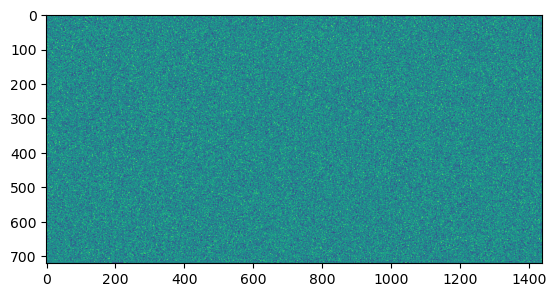

In [39]:
era_data = (era['temperature'].sel(level=1000).to_numpy())#*stds[0, -1, 0, 0])+means[0, -1, 0, 0]
# era_data = (era_data - era_data.mean())/era_data.std()
grib_data = grib['t'].sel(isobaricInhPa=1000).to_numpy()
# grib_data = (grib_data - grib_data.mean())/grib_data.std()
cds_data = cds.to_array().to_numpy()[0,0]
l = loss_n(torch.tensor(grib_data),torch.tensor(era_data))
print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(era_data)).max())
print("cds")

era_data = (era['relative_humidity'].sel(level=1000).to_numpy()*100)#*stds[0, -1, 0, 0])+means[0, -1, 0, 0]
# era_data = (era_data - era_data.mean())/era_data.std()
grib_data = grib['r'].sel(isobaricInhPa=1000).to_numpy()

print("mae :",loss(torch.tensor(grib_data),torch.tensor(cds_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(cds_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(cds_data)).max())
print()
plt.imshow(l)
#plt.colorbar()

mae : tensor(75.2267)
 ae : tensor(78103328.)
max : tensor(138.9714)
cds
mae : tensor(0.0007)
 ae : tensor(730.9185)
max : tensor(0.0014)



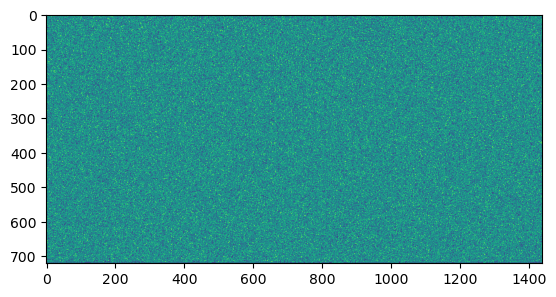

mae : tensor(0.0004)
 ae : tensor(402.6485)
max : tensor(0.0008)


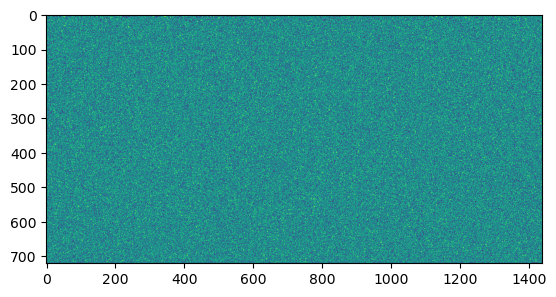

In [46]:
era = obs.sel(time="1999-06-15T12:00")
grib =  xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/inputs/ClimateInputData_199906151200.grib")
cds = xr.open_dataset("/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/1000/relative_humidity_1999_1000_.nc")

era_data = (era['relative_humidity'].sel(level=1000).to_numpy())
grib_data = grib['r'].sel(isobaricInhPa=1000).to_numpy()
cds_data = cds.sel(time="1999-06-15T12:00").to_array().to_numpy()[0]
l = loss_n(torch.tensor(grib_data),torch.tensor(cds_data))
print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(era_data)).max())
print("cds")

print("mae :",loss(torch.tensor(grib_data),torch.tensor(cds_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(cds_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(cds_data)).max())
print()
plt.imshow(l)
plt.show()

# Temperature
era_data = (era['temperature'].sel(level=1000).to_numpy())
grib_data = grib['t'].sel(isobaricInhPa=1000).to_numpy()

l = loss_n(torch.tensor(grib_data),torch.tensor(era_data))
print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(era_data)).max())

plt.imshow(l)


#
#plt.colorbar()

mae : tensor(75.2267)
 ae : tensor(78103328.)
max : tensor(138.9714)
cds
mae : tensor(0.0007)
 ae : tensor(730.9185)
max : tensor(0.0014)



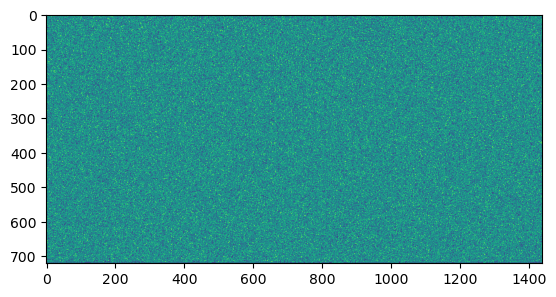

In [67]:
era = obs.sel(time="1999-06-15T12:00")
grib =  xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/inputs/ClimateInputData_199906151200.grib")
cds = xr.open_dataset("/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/1000/relative_humidity_1999_1000_.nc")

grib_new = xr.open_dataset("/mnt/qb/goswami/data/era5/r1000_19990615.grib")
nc_new = xr.open_dataset("/mnt/qb/goswami/data/era5/r1000_19990615.nc")

era_data = (era['relative_humidity'].sel(level=1000).to_numpy())
grib_data = grib['r'].sel(isobaricInhPa=1000).to_numpy()
cds_data = cds.sel(time="1999-06-15T12:00").to_array().to_numpy()[0]
l = loss_n(torch.tensor(grib_data),torch.tensor(cds_data))
print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(era_data)).max())
print("cds")

print("mae :",loss(torch.tensor(grib_data),torch.tensor(cds_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(cds_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(cds_data)).max())
print()
plt.imshow(l)
plt.show()

# # Temperature
# era_data = (era['temperature'].sel(level=1000).to_numpy())
# grib_data = grib['t'].sel(isobaricInhPa=1000).to_numpy()

# l = loss_n(torch.tensor(grib_data),torch.tensor(era_data))
# print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
# print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
# print("max :",loss_n(torch.tensor(grib_data),torch.tensor(era_data)).max())

# plt.imshow(l)


#
#plt.colorbar()

In [ ]:
grib_new = xr.open_dataset("/mnt/qb/goswami/data/era5/r1000_19990615.grib")
nc_new = xr.open_dataset("/mnt/qb/goswami/data/era5/r1000_19990615.nc")

In [53]:
net = nc_new.to_array().to_numpy()[0]
gb = grib_new.to_array().to_numpy()
np.equal(net,gb)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])

In [68]:
loss(torch.tensor(grib_data),torch.tensor(gb[0]))

tensor(0.)

In [65]:
gb

array([[[ 82.667145,  82.667145,  82.667145, ...,  82.667145,
          82.667145,  82.667145],
        [ 81.86246 ,  81.85855 ,  81.85074 , ...,  81.88199 ,
          81.87808 ,  81.87027 ],
        [ 81.7023  ,  81.69449 ,  81.68277 , ...,  81.73355 ,
          81.72183 ,  81.71402 ],
        ...,
        [ 99.80386 ,  99.81558 ,  99.823395, ...,  99.77261 ,
          99.78433 ,  99.79605 ],
        [100.59683 , 100.604645, 100.60855 , ..., 100.58121 ,
         100.58511 , 100.592926],
        [ 99.499176,  99.499176,  99.499176, ...,  99.499176,
          99.499176,  99.499176]]], dtype=float32)

In [66]:
grib_data

array([[272.8262 , 272.8262 , 272.8262 , ..., 272.8262 , 272.8262 ,
        272.8262 ],
       [272.72855, 272.7266 , 272.7266 , ..., 272.72855, 272.72855,
        272.72855],
       [272.65433, 272.65433, 272.65237, ..., 272.65823, 272.65628,
        272.65628],
       ...,
       [242.59769, 242.60745, 242.61526, ..., 242.5723 , 242.58011,
        242.58987],
       [242.73636, 242.74417, 242.75394, ..., 242.71292, 242.72073,
        242.72855],
       [242.09573, 242.09573, 242.09573, ..., 242.09573, 242.09573,
        242.09573]], dtype=float32)

### SP

In [69]:
grib_new_sp = xr.open_dataset("/mnt/qb/goswami/data/era5/sp_19990615.grib")
nc_new_sp = xr.open_dataset("/mnt/qb/goswami/data/era5/sp_19990615.nc")

In [73]:
net_sp = nc_new_sp.to_array().to_numpy()[0]
gb_sp = grib_new_sp.to_array().to_numpy()
loss(torch.tensor(net_sp),torch.tensor(gb_sp))

tensor(0.2058)

In [72]:
gb_sp.shape

(1, 721, 1440)

mae : tensor(0.2068)
 ae : tensor(214705.9219)
max : tensor(0.4141)


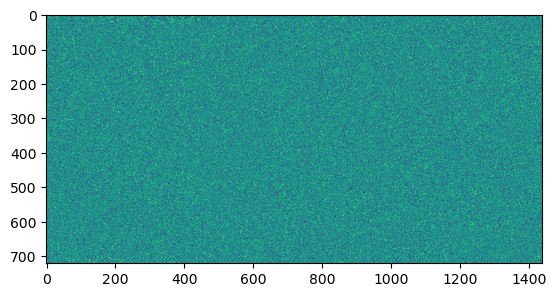

In [48]:
# SP
era_data = (era['surface_pressure'].to_numpy())
grib_data = grib['sp'].to_numpy()

l = loss_n(torch.tensor(grib_data),torch.tensor(era_data))
print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print("max :",loss_n(torch.tensor(grib_data),torch.tensor(era_data)).max())

plt.imshow(l)
plt.show()

In [41]:
cds

<xarray.Dataset> Size: 6GB
Dimensions:    (longitude: 1440, latitude: 721, time: 1460)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 12kB 1999-01-01 ... 1999-12-31T18:00:00
Data variables:
    r          (time, latitude, longitude) float32 6GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-14 19:05:14 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

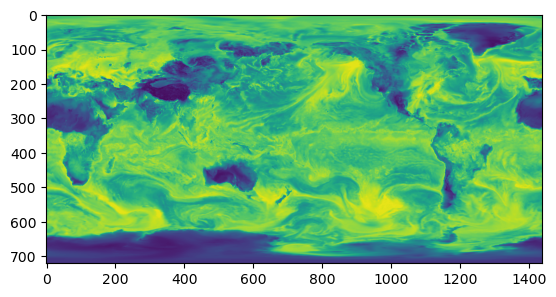

In [132]:
plt.imshow(era_data)

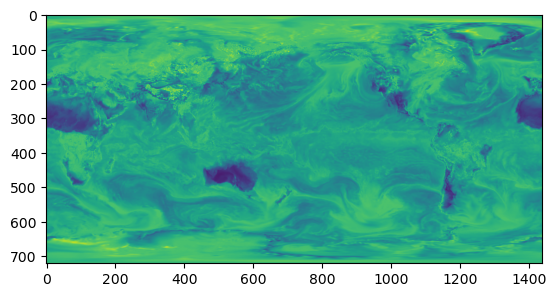

In [133]:
plt.imshow(grib_data)

In [114]:
era_data

array([[76.37434 , 76.37434 , 76.37434 , ..., 76.37434 , 76.37434 ,
        76.37434 ],
       [74.535164, 74.488846, 74.497604, ..., 74.50878 , 74.51765 ,
        74.535164],
       [74.45433 , 74.48065 , 74.506966, ..., 74.44694 , 74.455765,
        74.42805 ],
       ...,
       [16.720007, 16.716522, 16.71478 , ..., 16.725271, 16.725271,
        16.721748],
       [16.341259, 16.341259, 16.339558, ..., 16.346403, 16.3447  ,
        16.3447  ],
       [16.438679, 16.438679, 16.438679, ..., 16.438679, 16.438679,
        16.438679]], dtype=float32)

In [115]:
grib_data

array([[94.409904, 94.409904, 94.409904, ..., 94.409904, 94.409904,
        94.409904],
       [92.60912 , 92.60522 , 92.597404, ..., 92.63256 , 92.62475 ,
        92.616936],
       [92.003654, 91.99584 , 91.98803 , ..., 92.02709 , 92.01928 ,
        92.01147 ],
       ...,
       [91.83178 , 91.82397 , 91.81225 , ..., 91.85912 , 91.847404,
        91.83959 ],
       [93.14037 , 93.13647 , 93.13647 , ..., 93.148186, 93.14428 ,
        93.14428 ],
       [93.61303 , 93.61303 , 93.61303 , ..., 93.61303 , 93.61303 ,
        93.61303 ]], dtype=float32)

In [144]:
old_era = xr.open_dataset("/mnt/qb/goswami/data/era5/single_pressure_level/surface_pressure/surface_pressure_2019.nc")

<xarray.Dataset> Size: 4MB
Dimensions:    (longitude: 1440, latitude: 721)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
    time       datetime64[ns] 8B 2019-01-01
Data variables:
    sp         (latitude, longitude) float32 4MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-10 07:27:54 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

In [148]:
era_data = (era['surface_pressure'].to_numpy())#*stds[0, -1, 0, 0])+means[0, -1, 0, 0]
grib_data = grib['sp'].to_numpy()
old_era_data = old_era.sel(time="2019-01-01T00:00").to_array().to_numpy()
print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print()

print("mae :",loss(torch.tensor(grib_data),torch.tensor(old_era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(old_era_data)))

l = loss_n(torch.tensor(grib_data),torch.tensor(era_data))

mae : tensor(0.2142)
 ae : tensor(222343.2656)

mae : tensor(0.2207)
 ae : tensor(229154.6406)


/opt/conda/envs/model/lib/python3.11/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([1, 721, 1440])) that is different to the input size (torch.Size([721, 1440])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [119]:
l.argmax()

tensor(711081)

In [123]:
711081/1440

493.80625

In [124]:
711081-493*1440

1161

In [127]:
l[484:502,1152:1170]

tensor([[0.3125, 0.4062, 0.1484, 0.1094, 0.0312, 0.2969, 0.2578, 0.1328, 0.1172,
         0.0469, 0.2422, 0.4062, 0.3672, 0.1328, 0.3984, 0.1172, 0.3828, 0.1406],
        [0.2422, 0.0156, 0.2656, 0.4062, 0.3359, 0.3906, 0.1406, 0.3477, 0.2656,
         0.1172, 0.2422, 0.3906, 0.0859, 0.2578, 0.1719, 0.1484, 0.2891, 0.3516],
        [0.3594, 0.1797, 0.2656, 0.2266, 0.1562, 0.0703, 0.2969, 0.3594, 0.2305,
         0.1406, 0.1562, 0.3359, 0.2578, 0.3984, 0.2734, 0.1172, 0.2266, 0.0391],
        [0.1797, 0.2656, 0.1719, 0.2031, 0.0781, 0.0703, 0.1328, 0.4023, 0.1875,
         0.2188, 0.2422, 0.2578, 0.0938, 0.0312, 0.2734, 0.4062, 0.3203, 0.0234],
        [0.2266, 0.3984, 0.0625, 0.0000, 0.2734, 0.0156, 0.1094, 0.3906, 0.3750,
         0.0156, 0.3125, 0.1250, 0.3828, 0.4219, 0.4297, 0.0234, 0.2578, 0.2812],
        [0.1719, 0.1016, 0.0312, 0.4297, 0.1797, 0.0781, 0.2031, 0.1562, 0.3516,
         0.0312, 0.3750, 0.3828, 0.1172, 0.3594, 0.2656, 0.3281, 0.0781, 0.3281],
        [0.3125, 0.093

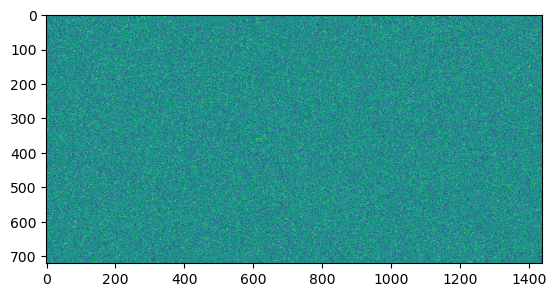

In [130]:
plt.imshow(l)

In [96]:
era_data

array([[100421.22 , 100421.22 , 100421.22 , ..., 100421.22 , 100421.22 ,
        100421.22 ],
       [100410.06 , 100410.06 , 100410.06 , ..., 100410.914, 100410.914,
        100410.914],
       [100410.06 , 100410.06 , 100409.2  , ..., 100411.77 , 100410.914,
        100410.914],
       ...,
       [ 69465.2  ,  69461.77 ,  69458.336, ...,  69472.93 ,  69470.35 ,
         69466.92 ],
       [ 69285.85 ,  69284.14 ,  69282.42 , ...,  69290.15 ,  69289.29 ,
         69287.57 ],
       [ 69119.375,  69119.375,  69119.375, ...,  69119.375,  69119.375,
         69119.375]], dtype=float32)

In [97]:
grib_data

array([[100421.16, 100421.16, 100421.16, ..., 100421.16, 100421.16,
        100421.16],
       [100410.16, 100410.16, 100410.16, ..., 100411.16, 100411.16,
        100411.16],
       [100410.16, 100410.16, 100409.16, ..., 100412.16, 100411.16,
        100411.16],
       ...,
       [ 69465.16,  69462.16,  69458.16, ...,  69473.16,  69470.16,
         69467.16],
       [ 69286.16,  69284.16,  69282.16, ...,  69290.16,  69289.16,
         69287.16],
       [ 69119.16,  69119.16,  69119.16, ...,  69119.16,  69119.16,
         69119.16]], dtype=float32)

In [99]:
era_data = (era['geopotential'].sel(level=1000).to_numpy())#*stds[0, -1, 0, 0])+means[0, -1, 0, 0]
grib_data = grib['z'].sel(isobaricInhPa=1000).to_numpy()

print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print()

mae : tensor(0.0294)
 ae : tensor(30498.2207)



In [105]:
era_data[300:400,1000:1100]

array([[299.24808, 299.36526, 299.45282, ..., 294.71097, 294.4441 ,
        295.3789 ],
       [299.5192 , 299.53473, 299.4627 , ..., 296.6851 , 296.09766,
        296.79526],
       [299.52344, 299.45   , 299.34552, ..., 295.66272, 295.54834,
        296.68228],
       ...,
       [297.06918, 297.02542, 296.99576, ..., 296.09766, 296.10895,
        296.07648],
       [296.98306, 296.93222, 296.84042, ..., 295.98047, 295.9988 ,
        295.9381 ],
       [296.8108 , 296.7303 , 296.62155, ..., 295.88162, 295.88867,
        295.86185]], dtype=float32)

In [106]:
grib_data[300:400,1000:1100]

array([[299.24823, 299.36542, 299.4533 , ..., 294.71112, 294.44354,
        295.3791 ],
       [299.5197 , 299.53534, 299.46307, ..., 296.68573, 296.09784,
        296.7951 ],
       [299.52362, 299.4494 , 299.3459 , ..., 295.6623 , 295.549  ,
        296.68182],
       ...,
       [297.06854, 297.02557, 296.99628, ..., 296.09784, 296.10956,
        296.07635],
       [296.9826 , 296.93182, 296.84003, ..., 295.98065, 295.99823,
        295.93768],
       [296.81073, 296.73065, 296.62128, ..., 295.88104, 295.88885,
        295.8615 ]], dtype=float32)

In [102]:
era_data = (era['2m_temperature'].to_numpy())#*stds[0, -1, 0, 0])+means[0, -1, 0, 0]
grib_data = grib['t2m'].to_numpy()

print("mae :",loss(torch.tensor(grib_data),torch.tensor(era_data)))
print(" ae :",loss_sum(torch.tensor(grib_data),torch.tensor(era_data)))
print()

mae : tensor(0.0004)
 ae : tensor(366.2846)



In [107]:
era_data[300:400,1000:1100]

array([[299.24808, 299.36526, 299.45282, ..., 294.71097, 294.4441 ,
        295.3789 ],
       [299.5192 , 299.53473, 299.4627 , ..., 296.6851 , 296.09766,
        296.79526],
       [299.52344, 299.45   , 299.34552, ..., 295.66272, 295.54834,
        296.68228],
       ...,
       [297.06918, 297.02542, 296.99576, ..., 296.09766, 296.10895,
        296.07648],
       [296.98306, 296.93222, 296.84042, ..., 295.98047, 295.9988 ,
        295.9381 ],
       [296.8108 , 296.7303 , 296.62155, ..., 295.88162, 295.88867,
        295.86185]], dtype=float32)

In [108]:
grib_data[300:400,1000:1100]

array([[299.24823, 299.36542, 299.4533 , ..., 294.71112, 294.44354,
        295.3791 ],
       [299.5197 , 299.53534, 299.46307, ..., 296.68573, 296.09784,
        296.7951 ],
       [299.52362, 299.4494 , 299.3459 , ..., 295.6623 , 295.549  ,
        296.68182],
       ...,
       [297.06854, 297.02557, 296.99628, ..., 296.09784, 296.10956,
        296.07635],
       [296.9826 , 296.93182, 296.84003, ..., 295.98065, 295.99823,
        295.93768],
       [296.81073, 296.73065, 296.62128, ..., 295.88104, 295.88885,
        295.8615 ]], dtype=float32)

In [110]:
era_data.dtype

dtype('float32')

In [111]:
grib_data.dtype

dtype('float32')

# Issue variables
### surface_pressure         (0.2142)
### mean_sea_level_pressure (0.0391)
### geopotential  -         (0.0695)
### relative_humidity       (79.3117)


## New relative humidty

In [7]:
ds  = xr.open_mfdataset(
    [
        "/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/100/relative_humidity_1979_100_.nc",
        "/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/100/relative_humidity_1980_100_.nc",

        # "/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/200/relative_humidity_1979_200_.nc"
    ])

In [34]:
ds_100  = xr.open_mfdataset("/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/100/relative_humidity_*")

In [29]:
def combine_relative_humidity():
    levels = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
    datasets = []
    for level in levels:
        print(f"/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/{level}/relative_humidity_1979_*.nc")
        ds = xr.open_mfdataset(f"/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/{level}/relative_humidity_*.nc",chunks={'time':1,'level':13,'longitude':1440,'latitude':721})
        level_ = xr.DataArray([level],[('level',[level])])
        datasets.append(ds.expand_dims(level=level_))
    return xr.concat(datasets,dim="level")

In [24]:
level100 = xr.DataArray([100],[('level',[100])])
ds100 = ds.expand_dims(level=level100)

In [123]:
ds = xr.open_mfdataset(f"/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/100/relative_humidity_*.nc",chunks={'time':1,'level':13,'longitude':1440,'latitude':721})

In [124]:
ds

<xarray.Dataset> Size: 243GB
Dimensions:    (longitude: 1440, latitude: 721, time: 58440)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 468kB 1979-01-01 ... 2018-12-31T18:00:00
Data variables:
    r          (time, latitude, longitude) float32 243GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-14 09:21:20 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [27]:
ds200  = xr.open_mfdataset(
    [
        "/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/200/relative_humidity_1979_200_.nc",
        "/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/200/relative_humidity_1980_200_.nc",

        # "/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/200/relative_humidity_1979_200_.nc"
    ])

In [28]:
lv = 200
level = xr.DataArray([lv],[('level',[lv])])
ds200 = ds200.expand_dims(level=level)

In [29]:
ds200

<xarray.Dataset> Size: 12GB
Dimensions:    (level: 1, longitude: 1440, latitude: 721, time: 2924)
Coordinates:
  * level      (level) int64 8B 200
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 23kB 1979-01-01 ... 1980-12-31T18:00:00
Data variables:
    r          (level, time, latitude, longitude) float32 12GB dask.array<chunksize=(1, 1460, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-14 09:24:24 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [30]:
combinded = xr.concat([ds100,ds200],dim="level")

In [31]:
combinded

<xarray.Dataset> Size: 24GB
Dimensions:    (level: 2, longitude: 1440, latitude: 721, time: 2924)
Coordinates:
  * level      (level) int64 16B 100 200
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 23kB 1979-01-01 ... 1980-12-31T18:00:00
Data variables:
    r          (level, time, latitude, longitude) float32 24GB dask.array<chunksize=(1, 1460, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-14 09:21:20 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [30]:

from time import time

In [31]:
start = time()
data = combine_relative_humidity()
end = time()
print(end-start)

/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/50/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/100/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/150/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/200/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/250/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/300/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/400/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/500/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/600/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi_pressure_level/relative_humidity/700/relative_humidity_1979_*.nc
/mnt/qb/goswami/data/era5/multi

In [34]:
relative_humidity_data = xr.open_zarr("/mnt/qb/goswami/data/era5/relative_humidity_1979_to_2018.zarr",chunks=None)

In [35]:
x = relative_humidity_data.sel(time="1980-01-01T00:00").to_array().to_numpy()

In [49]:
relative_humidity_data

<xarray.Dataset> Size: 3TB
Dimensions:    (latitude: 721, level: 13, longitude: 1440, time: 58440)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 468kB 1979-01-01 ... 2018-12-31T18:00:00
Data variables:
    r          (level, time, latitude, longitude) float32 3TB ...

In [37]:
for i in range(13):
    print(np.isnan(x[0,i]).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0


In [36]:
mask = np.isnan(x[0,8])

In [38]:
x[0,8][mask]

array([nan, nan], dtype=float32)

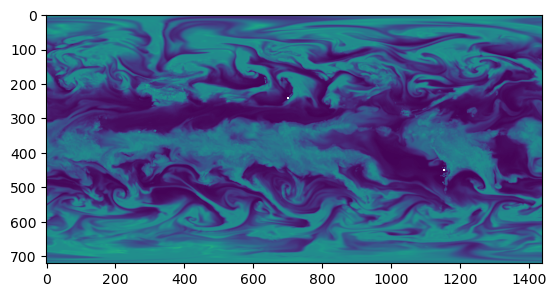

In [33]:
plt.imshow(x[0,8])

In [25]:
y = data.sel(time="1980-01-01T00:00").to_array().to_numpy()


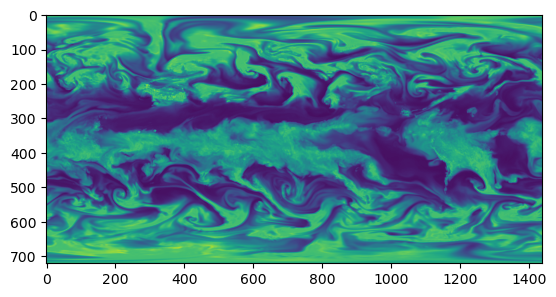

In [34]:
plt.imshow(y[0,8])

In [39]:
y[0,8][mask]

array([0.0200882, 0.0200882], dtype=float32)

In [43]:
import random 

In [45]:
start = time()
for i in range(10):
    idx = random.randint(0, 50060)
    print(idx)
    d = data.isel(time=idx).to_array().to_numpy()
    print(d.shape)
end = time()
print(end-start)

44996
(1, 13, 721, 1440)
24053
(1, 13, 721, 1440)
42009
(1, 13, 721, 1440)
48190
(1, 13, 721, 1440)
29213
(1, 13, 721, 1440)
19412
(1, 13, 721, 1440)
22103
(1, 13, 721, 1440)
10687
(1, 13, 721, 1440)
38188
(1, 13, 721, 1440)
25591
(1, 13, 721, 1440)
41.93372941017151


In [44]:
start = time()
for i in range(10):
    idx = random.randint(0, 50060)
    print(idx)
    d = relative_humidity_data.isel(time=idx).to_array().to_numpy()
    print(d.shape)
end = time()
print(end-start)

22172
(1, 13, 721, 1440)
25256
(1, 13, 721, 1440)
33403
(1, 13, 721, 1440)
12207
(1, 13, 721, 1440)
46543
(1, 13, 721, 1440)
45508
(1, 13, 721, 1440)
14840
(1, 13, 721, 1440)
23799
(1, 13, 721, 1440)
39195
(1, 13, 721, 1440)
47846
(1, 13, 721, 1440)
5.058935642242432


In [56]:
dn = data.isel(time=0).to_array().to_numpy()

In [58]:
dn[0,0,100,100]

16.301697

In [62]:
d50 = data.isel(time=0).sel(level=50).to_array().to_numpy()

In [66]:
d50[0,100,100]

16.301697

In [63]:
dn[0,4,100,100]

92.24736

In [67]:
d250 = data.isel(time=0).sel(level=250).to_array().to_numpy()
d250[0,100,100]

92.24736

In [18]:
data.sel(level=1000).isel(time=0).to_array().to_numpy()

array([[[98.65469 , 98.65469 , 98.65469 , ..., 98.65469 , 98.65469 ,
         98.65469 ],
        [97.31643 , 97.325096, 97.33088 , ..., 97.296196, 97.30486 ,
         97.31354 ],
        [94.726616, 94.738174, 94.752625, ..., 94.691925, 94.70349 ,
         94.71505 ],
        ...,
        [92.27843 , 92.27265 , 92.26976 , ..., 92.29577 , 92.28999 ,
         92.28421 ],
        [93.39702 , 93.39702 , 93.394135, ..., 93.408585, 93.40569 ,
         93.4028  ],
        [95.23822 , 95.23822 , 95.23822 , ..., 95.23822 , 95.23822 ,
         95.23822 ]]], dtype=float32)

# Test new SFNO

In [12]:
sfno = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/forecast_weights_lead_time=112_time=01.01.1979-01.01.1979_denormalised.zarr")

In [3]:
sfno_old = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/forecast_lead_time=112_steps=350_time=2016-2018-shuffled_denormalised.zarr")
sfno_old


<xarray.Dataset> Size: 516GB
Dimensions:                    (prediction_timedelta: 5, time: 350,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 3kB 2016-01-31 ... 2017-...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 7GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 7GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 7GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 94GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 7GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 94GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 7GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 94GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 7GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 94GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 94GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [4]:
sfno

<xarray.Dataset> Size: 2GB
Dimensions:                    (prediction_timedelta: 2, time: 3,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 16B 06:...
  * time                       (time) datetime64[ns] 24B 1979-01-01 ... 1979-...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 25MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 25MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 25MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 324MB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 25MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 324MB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 25MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 324MB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 25MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 324MB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 324MB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [7]:
x = np.load("/mnt/qb/work2/goswami0/gkd965/outputs/sfno/sfno_origgrib_1979010101.npy")

In [8]:
x.shape

(1, 73, 721, 1440)

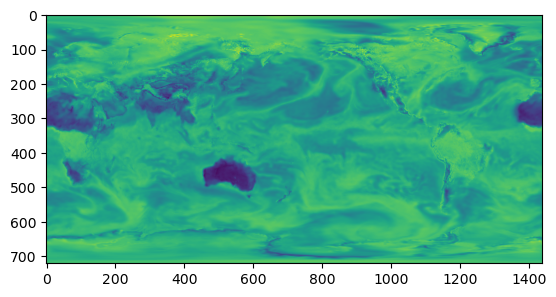

In [10]:
plt.imshow(x[0,-1])

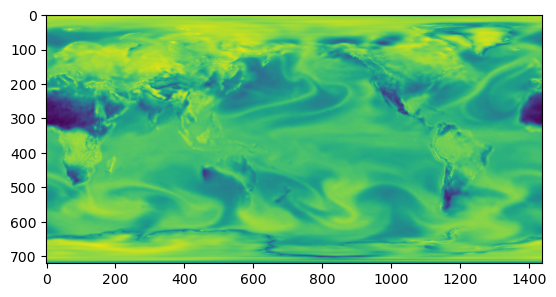

In [15]:
plt.imshow(sfno["relative_humidity"].isel(time=0).sel(level=1000,prediction_timedelta="28days").to_numpy())

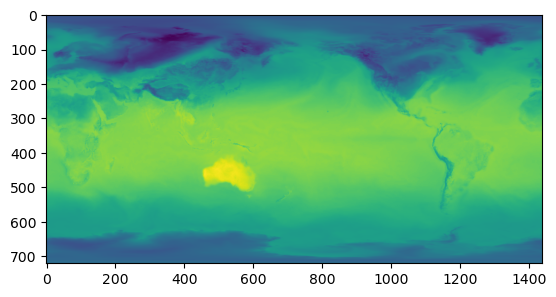

In [13]:
plt.imshow(sfno["2m_temperature"].isel(time=0).sel(prediction_timedelta="6hr").to_numpy())

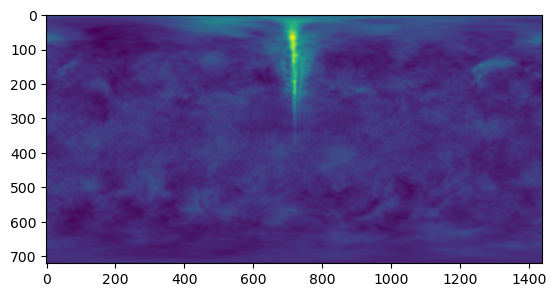

In [26]:
plt.imshow(sfno_old["2m_temperature"].isel(time=0).sel(prediction_timedelta="6hr").to_numpy())

In [16]:
t = xr.open_dataset("/mnt/qb/goswami/data/era5//multi_pressure_level/relative_humidity/150/relative_humidity_1979_150_.nc")

In [121]:
t2 = xr.open_dataset("/mnt/qb/goswami/data/era5//multi_pressure_level/relative_humidity/250/relative_humidity_1998_250_.nc")

In [122]:
t2

<xarray.Dataset> Size: 6GB
Dimensions:    (longitude: 1440, latitude: 721, time: 1460)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 12kB 1998-01-01 ... 1998-12-31T18:00:00
Data variables:
    r          (time, latitude, longitude) float32 6GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-15 07:19:11 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...

In [22]:
tn = t.to_array().to_numpy()

In [118]:
np.isnan(tn).sum()

0

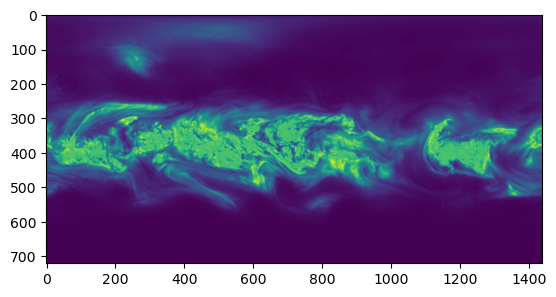

In [21]:
t = xr.open_dataset("/mnt/qb/goswami/data/era5//multi_pressure_level/relative_humidity/150/relative_humidity_1980_150_.nc")
plt.imshow(t.isel(time=0).to_array().to_numpy()[0])

# Speedtest

In [130]:
import random
from time import time

In [136]:
print(data)

<xarray.Dataset> Size: 3TB
Dimensions:    (level: 13, longitude: 1440, latitude: 721, time: 58440)
Coordinates:
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 468kB 1979-01-01 ... 2018-12-31T18:00:00
Data variables:
    r          (level, time, latitude, longitude) float32 3TB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-15 01:26:24 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


In [133]:
start = time()
for i in range(20):
    idx = random.randint(0, 1460)
    print(idx)
    d = data.isel(time=idx).to_array().to_numpy()
    print(d.shape)
end = time()
print(end-start)

489
(1, 13, 721, 1440)
366
(1, 13, 721, 1440)
313
(1, 13, 721, 1440)
686
(1, 13, 721, 1440)
1389
(1, 13, 721, 1440)
145
(1, 13, 721, 1440)
238
(1, 13, 721, 1440)
1259
(1, 13, 721, 1440)
1056
(1, 13, 721, 1440)
922
(1, 13, 721, 1440)
75
(1, 13, 721, 1440)
706
(1, 13, 721, 1440)
12
(1, 13, 721, 1440)
798
(1, 13, 721, 1440)
1277
(1, 13, 721, 1440)
30
(1, 13, 721, 1440)
679
(1, 13, 721, 1440)
556
(1, 13, 721, 1440)
698
(1, 13, 721, 1440)
352
(1, 13, 721, 1440)
39.86410689353943


In [4]:
levels = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]


In [4]:
obs2 = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr",chunks={'time':1,'level':13,'longitude':1440,'latitude':721})


/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [134]:
levels = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
    
start = time()
# for idx in list(range(40,70)):
#     # idx = random.randint(0, 1460)
#     print(idx)
for i in range(20):
    idx = random.randint(0, 1460)
    d = obs.isel(time=idx).sel(level=levels)["relative_humidity"].to_numpy()
    print(d.shape)
end = time()
print(end-start)

(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
(13, 721, 1440)
10.160103559494019


In [7]:
levels = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
    
start = time()
for idx in list(range(0,30)):
    # idx = random.randint(0, 1460)
    print(idx)
    d = obs2.isel(time=idx).sel(level=levels)["relative_humidity"].to_numpy()
    print(d.shape)
end = time()
print(end-start)

0
(13, 721, 1440)
1
(13, 721, 1440)
2
(13, 721, 1440)
3
(13, 721, 1440)
4
(13, 721, 1440)
5
(13, 721, 1440)
6
(13, 721, 1440)
7
(13, 721, 1440)
8
(13, 721, 1440)
9
(13, 721, 1440)
10
(13, 721, 1440)
11
(13, 721, 1440)
12
(13, 721, 1440)
13
(13, 721, 1440)
14
(13, 721, 1440)
15
(13, 721, 1440)
16
(13, 721, 1440)
17
(13, 721, 1440)
18
(13, 721, 1440)
19
(13, 721, 1440)
20
(13, 721, 1440)
21
(13, 721, 1440)
22
(13, 721, 1440)
23
(13, 721, 1440)
24
(13, 721, 1440)
25
(13, 721, 1440)
26
(13, 721, 1440)
27
(13, 721, 1440)
28
(13, 721, 1440)
29
(13, 721, 1440)
18.296836614608765


In [73]:
t = obs.isel(time=2).sel(level=levels)["relative_humidity"].to_numpy()

In [74]:
t.shape

(13, 721, 1440)

In [10]:
data.chunks

Frozen({'level': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), 'time': (1460,), 'latitude': (721,), 'longitude': (1440,)})

In [11]:
print(data)

<xarray.Dataset> Size: 79GB
Dimensions:    (level: 13, longitude: 1440, latitude: 721, time: 1460)
Coordinates:
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 12kB 1979-01-01 ... 1979-12-31T18:00:00
Data variables:
    r          (level, time, latitude, longitude) float32 79GB dask.array<chunksize=(1, 1460, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-15 01:26:24 GMT by grib_to_netcdf-2.28.1: /opt/ecmw...


In [12]:
79*40

3160

In [21]:
obs_zarr = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr")
# era = obs.sel(time="2019-01-01T00:00")
# era['relative_humidity']

# Total Data Diff

In [11]:
times = [
    [obs.sel(time="1999-06-15T12:00"),xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/inputs/ClimateInputData_199906151200.grib")],
    [obs.sel(time="1979-01-01T00:00"),xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/inputs/ClimateInputData_197901010.grib")],
    [obs.sel(time="2019-01-01T00:00"),xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/inputs/ClimateInputData_201901010.grib")],
]
def calc_diff(times):
    grib_var = ["u","v","z","t","r"]
    for idx,(k,v) in enumerate(levels_per_pl.items()):
        for level in v:
            eras = []
            gribs = []
            for era, grib in times:
                eras.append(era[k].sel(level=level).to_numpy())
                gribs.append(grib[grib_var[idx]].sel(isobaricInhPa=level).to_numpy())
            print(k," - ",level)
            gribs__mean = torch.tensor(np.stack(gribs)).mean()
            print("mean :",gribs__mean,torch.tensor(np.stack(eras)).mean())
            mae=loss(torch.tensor(np.stack(gribs)),torch.tensor(np.stack(eras)))
            print("mae :",mae)
            print("max :",loss_n(torch.tensor(np.stack(gribs)),torch.tensor(np.stack(eras))).max())
            print("mae % :",mae/gribs__mean)
            print()
    for k,v in ordering_reverse.items():
        for era, grib in times:
            eras = []
            gribs = []
            eras.append(era[k].to_numpy())
            gribs.append(grib[ordering[v]].to_numpy())
        print(k)
        gribs__mean = torch.tensor(np.stack(gribs)).mean()
        print("mean :",gribs__mean,torch.tensor(np.stack(eras)).mean() )
        mae=loss(torch.tensor(np.stack(gribs)),torch.tensor(np.stack(eras)))
        print("mae :",mae)
        print("max :",loss_n(torch.tensor(np.stack(gribs)),torch.tensor(np.stack(eras))).max())
        print("mae % :",mae/gribs__mean)
        print()
    

In [12]:

calc_diff(times)

u_component_of_wind  -  1000
mean : tensor(-0.2505) tensor(-0.2505)
mae : tensor(0.0002)
max : tensor(0.0004)
mae % : tensor(-0.0008)

u_component_of_wind  -  925
mean : tensor(0.3358) tensor(0.3358)
mae : tensor(0.0003)
max : tensor(0.0007)
mae % : tensor(0.0010)

u_component_of_wind  -  850
mean : tensor(1.1694) tensor(1.1694)
mae : tensor(0.0003)
max : tensor(0.0007)
mae % : tensor(0.0003)

u_component_of_wind  -  700
mean : tensor(3.0978) tensor(3.0978)
mae : tensor(0.0003)
max : tensor(0.0007)
mae % : tensor(0.0001)

u_component_of_wind  -  600
mean : tensor(4.6361) tensor(4.6361)
mae : tensor(0.0003)
max : tensor(0.0007)
mae % : tensor(7.0616e-05)

u_component_of_wind  -  500
mean : tensor(6.4887) tensor(6.4887)
mae : tensor(0.0004)
max : tensor(0.0008)
mae % : tensor(5.8100e-05)

u_component_of_wind  -  400
mean : tensor(8.9128) tensor(8.9128)
mae : tensor(0.0005)
max : tensor(0.0009)
mae % : tensor(5.0499e-05)

u_component_of_wind  -  300
mean : tensor(12.0623) tensor(12.0623)


In [108]:
a = times[0][0]["2m_temperature"].to_numpy()

In [109]:
b = times[0][1][ordering[4]].to_numpy()

In [110]:
loss_n(torch.tensor(a),torch.tensor(b)).argmax()

tensor(2903)

In [103]:
2903/1440

2.015972222222222

In [104]:
2903-1440*2

23

In [105]:
a[2,23]

273.1943

In [2]:
sstz = xr.open_zarr("/mnt/qb/goswami/data/era5/sst_1_deg.zarr")

In [12]:
sstz

<xarray.Dataset> Size: 24GB
Dimensions:                  (latitude: 180, longitude: 360, time: 93544)
Coordinates:
  * latitude                 (latitude) float32 720B 89.62 88.62 ... -89.38
  * longitude                (longitude) float32 1kB 0.375 1.375 ... 358.4 359.4
  * time                     (time) datetime64[ns] 748kB 1959-01-01 ... 2023-...
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 24GB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

In [5]:
sst = obs["sea_surface_temperature"]

In [6]:
sst

<xarray.DataArray 'sea_surface_temperature' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
[97121122560 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Sea surface temperature
    short_name:  sst
    units:       K

In [7]:
sstz

<xarray.Dataset> Size: 24GB
Dimensions:                  (latitude: 180, longitude: 360, time: 93544)
Coordinates:
  * latitude                 (latitude) float32 720B 89.62 88.62 ... -89.38
  * longitude                (longitude) float32 1kB 0.375 1.375 ... 358.4 359.4
  * time                     (time) datetime64[ns] 748kB 1959-01-01 ... 2023-...
Data variables:
    sea_surface_temperature  (time, latitude, longitude) float32 24GB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>

In [41]:
for t in range(0,50000,1000):
    r = relative_humidity_data.isel(time=t)['r'].to_numpy()
    s = data.isel(time=t)['r'].to_numpy()
    print(t,(~np.equal(r,s)).sum())

0 0
1000 0
2000 0
3000 0
4000 0


KeyboardInterrupt: 

(180, 360)

In [18]:
sstz_n.shape

(180, 360)

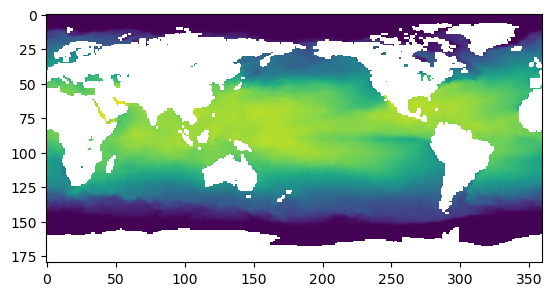

In [19]:
plt.imshow(sst_n)

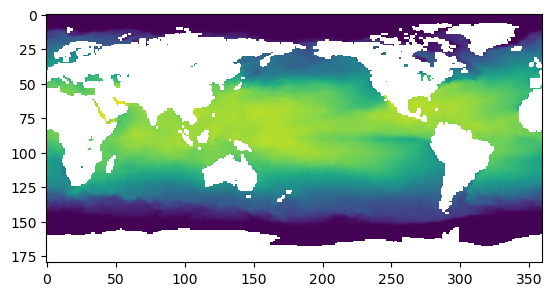

In [20]:
plt.imshow(sstz_n)

In [26]:
(~np.equal(sst_n[~np.isnan(sst_n)],sstz_n[~np.isnan(sstz_n)])).sum()

0

In [22]:
sst_n[-1,-1]

nan

In [23]:
sstz_n[-1,-1]

nan